In [1]:
import tensorflow as tf
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
data = '/content/drive/MyDrive/Assignment/Data for test'

In [4]:
df = os.listdir("/content/drive/MyDrive/Assignment/Data for test")
df

['Chair', 'Sofa', 'Bed']



## Data Preprocessing



In [5]:
# Data pre-processing 
# Rescaling the train dataset
train_ds = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.1
)

In [6]:

test_ds = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split= 0.1
)

In [7]:
train_ds = train_ds.flow_from_directory(data,
                                        target_size=(256,256),
                                        batch_size= 32,
                                        subset = 'training',
                                        class_mode = 'categorical')

Found 270 images belonging to 3 classes.


In [8]:
test_ds = test_ds.flow_from_directory(data,
                                        target_size=(256,256),
                                        batch_size= 32,
                                        subset = 'validation',
                                        class_mode = 'categorical')

Found 30 images belonging to 3 classes.


## Building the CNN

In [9]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

In [10]:
# Convolution
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(256,256,3)))

In [11]:
# Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
# Adding second convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
# Adding third Convilution layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))


In [14]:
# Flattening
cnn.add(tf.keras.layers.Flatten())


In [15]:
# Output Layer
cnn.add(tf.keras.layers.Dense(3,activation='softmax'))

In [16]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

## Training the CNN model

In [18]:
res = cnn.fit(train_ds,epochs=15,validation_data=test_ds)

Epoch 1/15
9/9 [==============================] - 61s 7s/step - loss: 1.0995 - accuracy: 0.3074 - val_loss: 1.0781 - val_accuracy: 0.3667
Epoch 2/15
9/9 [==============================] - 29s 3s/step - loss: 1.0833 - accuracy: 0.3963 - val_loss: 1.0527 - val_accuracy: 0.3333
Epoch 3/15
9/9 [==============================] - 29s 3s/step - loss: 1.0264 - accuracy: 0.6259 - val_loss: 0.9522 - val_accuracy: 0.8333
Epoch 4/15
9/9 [==============================] - 28s 3s/step - loss: 0.9419 - accuracy: 0.6370 - val_loss: 0.8283 - val_accuracy: 0.8667
Epoch 5/15
9/9 [==============================] - 29s 3s/step - loss: 0.7504 - accuracy: 0.8407 - val_loss: 0.5100 - val_accuracy: 0.8667
Epoch 6/15
9/9 [==============================] - 28s 3s/step - loss: 0.5267 - accuracy: 0.8222 - val_loss: 0.3609 - val_accuracy: 0.9000
Epoch 7/15
9/9 [==============================] - 28s 3s/step - loss: 0.4247 - accuracy: 0.8481 - val_loss: 0.2669 - val_accuracy: 0.9333
Epoch 8/15
9/9 [==================

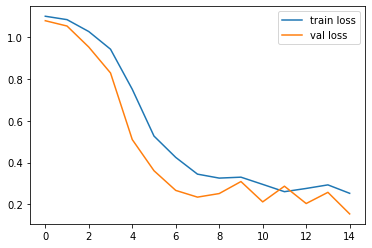

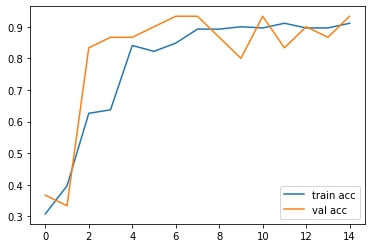

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss

plt.plot(res.history['loss'], label='train loss')
plt.plot(res.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(res.history['accuracy'], label='train acc')
plt.plot(res.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
import keras
from tensorflow.keras.models import load_model

In [21]:
cnn.save('data_model.h5')

In [22]:
model = load_model('data_model.h5')

In [23]:
import numpy as np
import keras.utils as image

def predict_image(img_path):
  test_im = image.load_img(path= img_path, target_size = (256, 256))
  img = plt.imshow(test_im)
  test_s = image.img_to_array(test_im)
  test_image = np.expand_dims(test_s, axis = 0)
  result = cnn.predict(test_image)
  Bed, Chair, Sofa = result[0]
    
  if Bed==1.:
      print('bed')
  elif Chair==1.:
      print('Chair')
  else:
      print('Sofa')
  return result

1/1 [==============================] - 0s 168ms/step
Sofa


array([[0., 0., 1.]], dtype=float32)

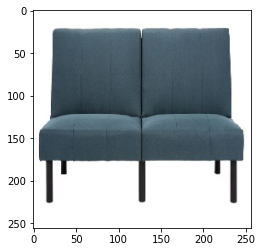

In [24]:
predict_image("/content/drive/MyDrive/Assignment/Data for test/Sofa/ASTORIA FOLDABLE FUTON BED.jpg")

1/1 [==============================] - 0s 29ms/step
Chair


array([[0., 1., 0.]], dtype=float32)

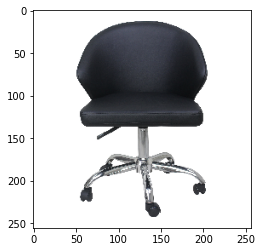

In [25]:
predict_image('/content/drive/MyDrive/Assignment/Data for test/Chair/ALBUS SWIVEL OFFICE CHAIR BLACK.jpg')

1/1 [==============================] - 0s 29ms/step
bed


array([[1., 0., 0.]], dtype=float32)

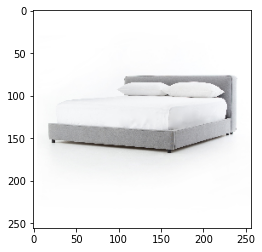

In [26]:
predict_image('/content/drive/MyDrive/Assignment/Data for test/Bed/Aidan Bed-Heavy Pebble Pewter-Queen.jpg')